In [139]:
#IMPORT DES BIBLIOTHQUES UTILISEES
import pandas as pd
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import CountVectorizer
import scipy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix
import nltk
from nltk.corpus import stopwords
import re

In [140]:
#on importe nos datasets
true = pd.read_csv("dataset1/True.csv")
fake = pd.read_csv("dataset1/Fake.csv")
dataset2=pd.read_csv("dataset2/news_articles.csv")

In [141]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [142]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [143]:
dataset2.head()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


In [144]:
#ON ETIQUETTE LES DONNEES DU PREMIER DATASET
true['class'] = 1
fake['class'] = 0

In [145]:
#CONCATENATION DES DATAFRAMES TRUE ET FAKE
dataset1=pd.concat([true, fake])
dataset1.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [146]:
#TRI DES ARTICLES PAR TYPE
true.subject.value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [147]:
fake.subject.value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [148]:
dataset2.type.value_counts()

bs            601
bias          436
conspiracy    430
hate          244
satire        146
state         121
junksci       102
fake           15
Name: type, dtype: int64

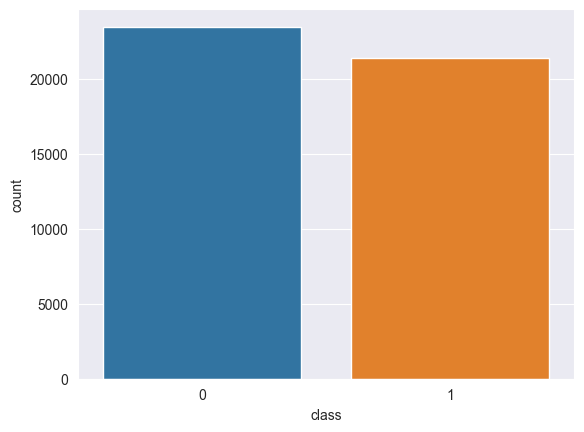

In [149]:
#ON VERIFIE LA REPARTITION DES DONNES DANS LE DATASET 1
sns.set_style("darkgrid")
# Tracer le countplot
sns.countplot(x="class", data=dataset1)
plt.show()

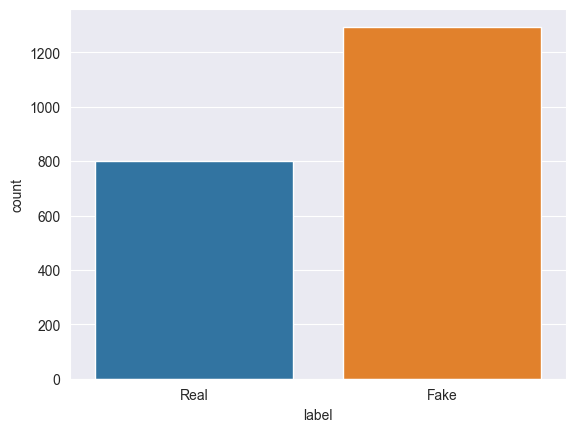

In [150]:
#ON VERIFIE LA REPARTITION DES DONNES DANS LE DATASET 2
sns.set_style("darkgrid")
# Tracer le countplot
sns.countplot(x="label", data=dataset2)
plt.show()

In [151]:
dataset1=pd.concat([true, fake])
dataset1.isna()
# Compter les NaN par colonne
nan_count_by_column = dataset1.isna().sum()
# Compter le nombre total de NaN dans le DataFrame
total_nan_count = dataset1.isna().sum().sum()
print(nan_count_by_column)
print(total_nan_count)

title      0
text       0
subject    0
date       0
class      0
dtype: int64
0


In [152]:
dataset2.isna()
# Compter les NaN par colonne
nan_count_by_column = dataset2.isna().sum()
# Compter le nombre total de NaN dans le DataFrame
total_nan_count = dataset2.isna().sum().sum()
print(nan_count_by_column)
print(total_nan_count)

author                      0
published                   0
title                       0
text                       46
language                    1
site_url                    1
main_img_url                1
type                        1
label                       1
title_without_stopwords     2
text_without_stopwords     50
hasImage                    1
dtype: int64
104


In [153]:
#on supprime les elements Nan
dataset2=dataset2.dropna(axis=0)

In [154]:
dataset1=dataset1[['title','text','class']]
dataset1.head()

,title,text,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


In [155]:
dataset2=dataset2[['title','text','label']]
dataset2.head()

,title,text,label
0,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,Real
1,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,Real
2,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,Real
3,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,Real
4,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,Real


In [156]:
#Mapping pour remplacer Real et Fake par 1 et 0
mapping = {'Real': 1, 'Fake': 0}
dataset2['label']=dataset2['label'].replace(mapping)
dataset2['label'] = dataset2['label'].astype(int)
dataset1 = dataset1.rename(columns={'class': 'label'})
dataset1.head()

,title,text,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


In [157]:
dataset2.head()

,title,text,label
0,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,1
1,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,1
2,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,1
3,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,1
4,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,1


In [158]:
#CONCATENATION DES 2 DATASETS
dataset=pd.concat([dataset1, dataset2])
dataset

,title,text,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,1
...,...,...,...
2041,why never trumpers must reconsider,prof canoes reek of genocide white privilege c...,1
2042,election crossroads socialism or capitalism,teens walk free after gangrape conviction judg...,1
2043,reasons ill vote for trump,school named for munichmassacre mastermind ter...,1
2044,our new country women and minorities hit hardest,wars and rumors of wars russia unveils satan ...,1


In [159]:
#Concaténation des 2 colonnes titre et texte
dataset['combined_text'] = dataset['title'] + ' ' + dataset['text']
dataset

,title,text,label,combined_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,1,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,1,Trump wants Postal Service to charge 'much mor...
...,...,...,...,...
2041,why never trumpers must reconsider,prof canoes reek of genocide white privilege c...,1,why never trumpers must reconsider prof canoes...
2042,election crossroads socialism or capitalism,teens walk free after gangrape conviction judg...,1,election crossroads socialism or capitalism te...
2043,reasons ill vote for trump,school named for munichmassacre mastermind ter...,1,reasons ill vote for trump school named for mu...
2044,our new country women and minorities hit hardest,wars and rumors of wars russia unveils satan ...,1,our new country women and minorities hit harde...


In [160]:
#Conversion des lettres en minuscule
dataset['combined_text'] = dataset['combined_text'].str.lower()
dataset

,title,text,label,combined_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1,"as u.s. budget fight looms, republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1,u.s. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,1,senior u.s. republican senator: 'let mr. muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,1,fbi russia probe helped by australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,1,trump wants postal service to charge 'much mor...
...,...,...,...,...
2041,why never trumpers must reconsider,prof canoes reek of genocide white privilege c...,1,why never trumpers must reconsider prof canoes...
2042,election crossroads socialism or capitalism,teens walk free after gangrape conviction judg...,1,election crossroads socialism or capitalism te...
2043,reasons ill vote for trump,school named for munichmassacre mastermind ter...,1,reasons ill vote for trump school named for mu...
2044,our new country women and minorities hit hardest,wars and rumors of wars russia unveils satan ...,1,our new country women and minorities hit harde...


In [161]:
#Retrait des caractères non alpha-numériques
dataset['combined_text'] = dataset['combined_text'].str.replace('[^\w\s]', '')
dataset

C:\Users\moadb\AppData\Local\Temp\ipykernel_37532\2735860743.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['combined_text'] = dataset['combined_text'].str.replace('[^\w\s]', '')


,title,text,label,combined_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1,as us budget fight looms republicans flip thei...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1,us military to accept transgender recruits on ...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,1,senior us republican senator let mr mueller do...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,1,fbi russia probe helped by australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,1,trump wants postal service to charge much more...
...,...,...,...,...
2041,why never trumpers must reconsider,prof canoes reek of genocide white privilege c...,1,why never trumpers must reconsider prof canoes...
2042,election crossroads socialism or capitalism,teens walk free after gangrape conviction judg...,1,election crossroads socialism or capitalism te...
2043,reasons ill vote for trump,school named for munichmassacre mastermind ter...,1,reasons ill vote for trump school named for mu...
2044,our new country women and minorities hit hardest,wars and rumors of wars russia unveils satan ...,1,our new country women and minorities hit harde...


In [162]:
#CODE DES FONCTIONS QUI PERMETTENT DE NETTOYER LE TEXTE

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

#FONCTION POUR RETIRER LES STOPWORDS
def remove_stop_words(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

#FONCTION POUR RETIRER LES NOMBRES
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

# Fonction pour garder uniquement les lettres et les espaces
def keep_letters_and_spaces(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moadb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [163]:
#Aperçu des stop words qu'on retrouve en anglais
for i in stop_words :
    print(i,end=" ")

were isn be that have these up ours didn't out any above such wouldn we this it hers further shouldn't only why won't your yours those was same itself the hasn't both during their as here no against herself needn i all has not didn he through below which does weren from yourself to aren don o down themselves should its is before but should've you wasn't mightn't between over about our ve you'd am or just hadn't at d ma ain too them when shan't an can wasn she's and doesn't nor it's they because you'll under y some s while aren't hadn his very after t mustn of into my re haven't where for me couldn off other doesn will own her yourselves whom did couldn't shouldn haven wouldn't again each do on with by him doing mustn't ll won being been most how weren't isn't shan that'll don't she are theirs in until few more ourselves what then hasn than mightn having you're if had you've who there once so now myself himself needn't m a 

In [164]:
#On applique nos fonctions à nos données 
dataset['final_text'] = dataset['combined_text'].apply(remove_stop_words)
dataset['final_text2'] = dataset['final_text'].apply(remove_numbers)
dataset['final_text3'] = dataset['final_text2'].apply(keep_letters_and_spaces)
dataset = dataset[['final_text3','label']].copy()
dataset = dataset.rename(columns={'final_text3': 'combined_text'})

In [165]:
dataset #visualisation du dataframe apres traitement

,combined_text,label
0,us budget fight looms republicans flip fiscal ...,1
1,us military accept transgender recruits monday...,1
2,senior us republican senator let mr mueller jo...,1
3,fbi russia probe helped australian diplomat ti...,1
4,trump wants postal service charge much amazon ...,1
...,...,...
2041,never trumpers must reconsider prof canoes ree...,1
2042,election crossroads socialism capitalism teens...,1
2043,reasons ill vote trump school named munichmass...,1
2044,new country women minorities hit hardest wars ...,1


In [166]:
#INSTANCIATION DU VECTEUR TF IDF POUR EXTRAIRE LES FEATURES

max_features_value=1000
tfidf = TfidfVectorizer(max_features=max_features_value)
tfidf.fit(dataset['combined_text'])
tfidf_features = tfidf.transform(dataset['combined_text'])

tfidf_features_sparse = csr_matrix(tfidf_features)
tfidf_df = pd.DataFrame.sparse.from_spmatrix(tfidf_features_sparse, columns=tfidf.get_feature_names_out())
tfidf_df

,able,absolutely,access,according,account,accused,across,act,action,actions,...,would,wrong,wrote,year,yearold,years,yes,yet,york,young
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.038195,0.000000,...,0.054874,0.0,0.000000,0.000000,0.00000,0.078322,0.0,0.035033,0.000000,0.041483
1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.139769,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.025287,0.0,0.000000,0.036039,0.00000,0.000000,0.0,0.000000,0.093597,0.000000
3,0.0,0.0,0.0,0.048397,0.0,0.065368,0.000000,0.0,0.000000,0.072391,...,0.030798,0.0,0.000000,0.043893,0.00000,0.000000,0.0,0.000000,0.170993,0.000000
4,0.0,0.0,0.0,0.128414,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.016344,0.0,0.034529,0.116464,0.00000,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46938,0.0,0.0,0.0,0.112495,0.0,0.151941,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000
46939,0.0,0.0,0.0,0.104794,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.14633,0.000000,0.0,0.000000,0.000000,0.000000
46940,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000
46941,0.0,0.0,0.0,0.000000,0.0,0.000000,0.107844,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000


In [167]:
#Réduction de la dimension par ACP
from sklearn.decomposition import PCA
pca = PCA(n_components=100)  # Remplacez k par le nombre souhaité de dimensions
tfidf_features_pca = pca.fit_transform(tfidf_features.toarray())

In [168]:
tfidf_features_pca

array([[ 0.03401422,  0.14916066,  0.26961786, ..., -0.01051384,
         0.02268072, -0.03579916],
       [-0.01291415,  0.17876889,  0.0503786 , ..., -0.00692371,
        -0.04520858, -0.04319062],
       [ 0.22631324,  0.21686726,  0.14012061, ...,  0.00686495,
        -0.00684307, -0.0211887 ],
       ...,
       [-0.04549136, -0.10063245, -0.08038187, ..., -0.02502617,
         0.07933227,  0.09956007],
       [-0.12810953,  0.06493473, -0.08567393, ...,  0.02018878,
        -0.01870776,  0.07085081],
       [ 0.1578428 , -0.14961634,  0.05152922, ..., -0.03231689,
         0.00880351, -0.01344273]])

In [169]:
dataset['length']=dataset['combined_text'].str.len()  # ON CALCULE LA LONGUEUR DE CHAQUE ENTREE
dataset['num']=dataset['combined_text'].str.split().map(lambda x: len(x)) # ON CALCULE LE NOMBRE DE MOTS UTILISES POUR CHAQUE ENTREE
dataset

,combined_text,label,length,num
0,us budget fight looms republicans flip fiscal ...,1,3408,447
1,us military accept transgender recruits monday...,1,3098,381
2,senior us republican senator let mr mueller jo...,1,2028,270
3,fbi russia probe helped australian diplomat ti...,1,1858,235
4,trump wants postal service charge much amazon ...,1,3724,494
...,...,...,...,...
2041,never trumpers must reconsider prof canoes ree...,1,635,84
2042,election crossroads socialism capitalism teens...,1,683,91
2043,reasons ill vote trump school named munichmass...,1,561,76
2044,new country women minorities hit hardest wars ...,1,632,90


In [170]:
tfidf_df

,able,absolutely,access,according,account,accused,across,act,action,actions,...,would,wrong,wrote,year,yearold,years,yes,yet,york,young
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.038195,0.000000,...,0.054874,0.0,0.000000,0.000000,0.00000,0.078322,0.0,0.035033,0.000000,0.041483
1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.139769,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.025287,0.0,0.000000,0.036039,0.00000,0.000000,0.0,0.000000,0.093597,0.000000
3,0.0,0.0,0.0,0.048397,0.0,0.065368,0.000000,0.0,0.000000,0.072391,...,0.030798,0.0,0.000000,0.043893,0.00000,0.000000,0.0,0.000000,0.170993,0.000000
4,0.0,0.0,0.0,0.128414,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.016344,0.0,0.034529,0.116464,0.00000,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46938,0.0,0.0,0.0,0.112495,0.0,0.151941,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000
46939,0.0,0.0,0.0,0.104794,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.14633,0.000000,0.0,0.000000,0.000000,0.000000
46940,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000
46941,0.0,0.0,0.0,0.000000,0.0,0.000000,0.107844,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000


In [172]:
#Normalisation des features grâce à la technique de mise en échelle Min Max
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#Choix des colonnes à normaliser
column_name = 'length'
column_name2 = 'num'

# Mise à l'échelle
dataset[column_name] = scaler.fit_transform(dataset[[column_name]])
dataset[column_name2] = scaler.fit_transform(dataset[[column_name2]])

In [173]:
dataset

,combined_text,label,length,num
0,us budget fight looms republicans flip fiscal ...,1,0.087505,0.091696
1,us military accept transgender recruits monday...,1,0.079510,0.078096
2,senior us republican senator let mr mueller jo...,1,0.051915,0.055224
3,fbi russia probe helped australian diplomat ti...,1,0.047531,0.048012
4,trump wants postal service charge much amazon ...,1,0.095654,0.101381
...,...,...,...,...
2041,never trumpers must reconsider prof canoes ree...,1,0.015990,0.016897
2042,election crossroads socialism capitalism teens...,1,0.017228,0.018339
2043,reasons ill vote trump school named munichmass...,1,0.014081,0.015248
2044,new country women minorities hit hardest wars ...,1,0.015912,0.018133


In [175]:
# On recopie les colonnes length/num/label dans le dataframe tf-idf
tfidf_df['length'] = dataset['length'].values
tfidf_df['num'] = dataset['num'].values
tfidf_df['label'] = dataset['label'].values
tfidf_df

,able,absolutely,access,according,account,accused,across,act,action,actions,...,year,yearold,years,yes,yet,york,young,length,num,label
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.038195,0.000000,...,0.000000,0.00000,0.078322,0.0,0.035033,0.000000,0.041483,0.087505,0.091696,1
1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.079510,0.078096,1
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.036039,0.00000,0.000000,0.0,0.000000,0.093597,0.000000,0.051915,0.055224,1
3,0.0,0.0,0.0,0.048397,0.0,0.065368,0.000000,0.0,0.000000,0.072391,...,0.043893,0.00000,0.000000,0.0,0.000000,0.170993,0.000000,0.047531,0.048012,1
4,0.0,0.0,0.0,0.128414,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.116464,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.095654,0.101381,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46938,0.0,0.0,0.0,0.112495,0.0,0.151941,0.000000,0.0,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.015990,0.016897,1
46939,0.0,0.0,0.0,0.104794,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.14633,0.000000,0.0,0.000000,0.000000,0.000000,0.017228,0.018339,1
46940,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.014081,0.015248,1
46941,0.0,0.0,0.0,0.000000,0.0,0.000000,0.107844,0.0,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.015912,0.018133,1


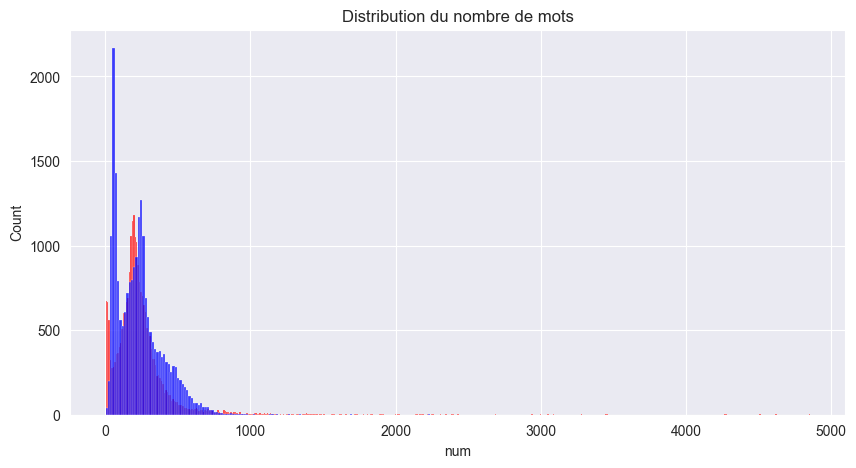

In [107]:
#Tracé de la distribution du nombre de mots selon le type d'articles
plt.figure(figsize=(10, 5))
num1 = dataset[dataset['label'] == 0 ]['num']
num2 = dataset[dataset['label'] == 1 ] ['num']

a=sns.histplot(num1 , color='red').set_title('Distribution du nombre de mots')
b=sns.histplot(num2 , color='blue')
plt.show()

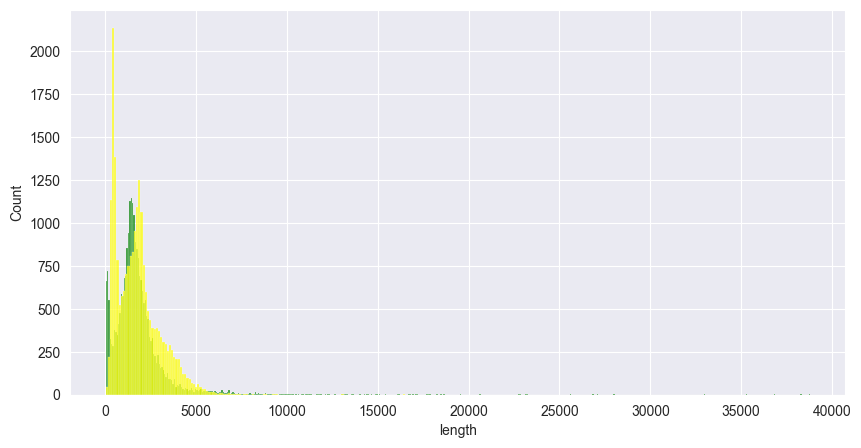

In [108]:
#Tracé de la longueur de l'article selon le type d'articles
plt.figure(figsize=(10 , 5))
num3 = dataset[dataset['label'] == 0 ]['length']
num4 = dataset[dataset['label'] == 1 ] ['length']

c=sns.histplot(num3 , color='green').set_title('')
d=sns.histplot(num4 , color='yellow')

plt.show()

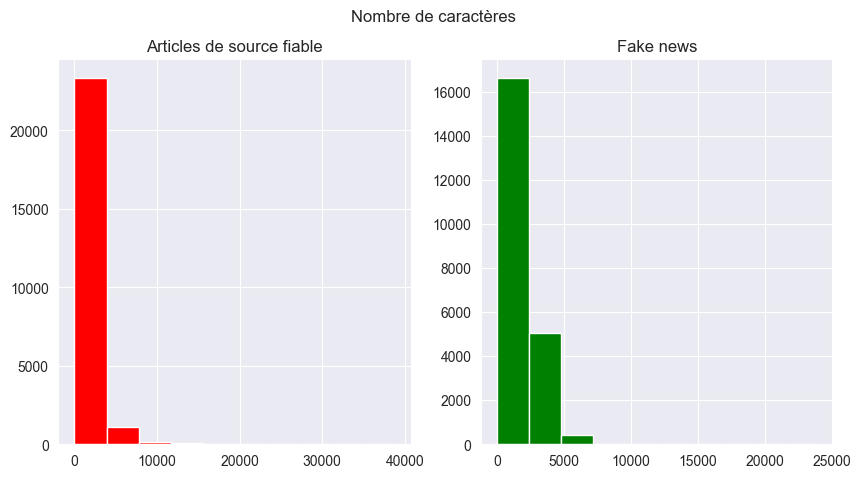

In [116]:
#Tracé de la distribution du nombre de mots selon le type d'articles
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=dataset[dataset['label']==0]['combined_text'].str.len()
ax1.hist(text_len,color='red')
ax1.set_title('Articles de source fiable')
text_len=dataset[dataset['label']==1]['combined_text'].str.len()
ax2.hist(text_len,color='green')
ax2.set_title('Fake news')
fig.suptitle('Nombre de caractères')
plt.show()

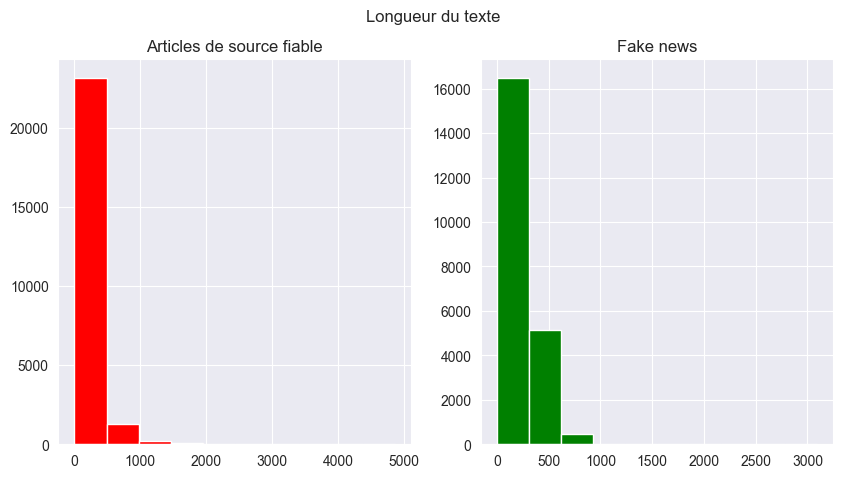

In [117]:
#Tracé de la longueur de l'article selon le type d'articles
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=dataset[dataset['label']==0]['combined_text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='red')
ax1.set_title('Articles de source fiable')
text_len=dataset[dataset['label']==1]['combined_text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='green')
ax2.set_title('Fake news')
fig.suptitle('Longueur du texte')
plt.show()

In [118]:
#Fonction pour traiter la donnée d'entrée sur le site
def predict(title,text):
    combined_text=title+" "+text
    combined_text = remove_stop_words(combined_text)
    combined_text = remove_numbers(combined_text)
    combined_text = keep_letters_and_spaces(combined_text)
    tfidf_features2 = tfidf.transform([combined_text])
    tfidf_df2 = pd.DataFrame(tfidf_features2.toarray(), columns=tfidf.get_feature_names_out())
    return tfidf_df2

In [120]:
#TEST SUR UNE ENTREE QUELCONQUE
predict("hello my name is","i agree with you")

,able,absolutely,access,according,account,accused,across,act,action,actions,...,would,wrong,wrote,year,yearold,years,yes,yet,york,young
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


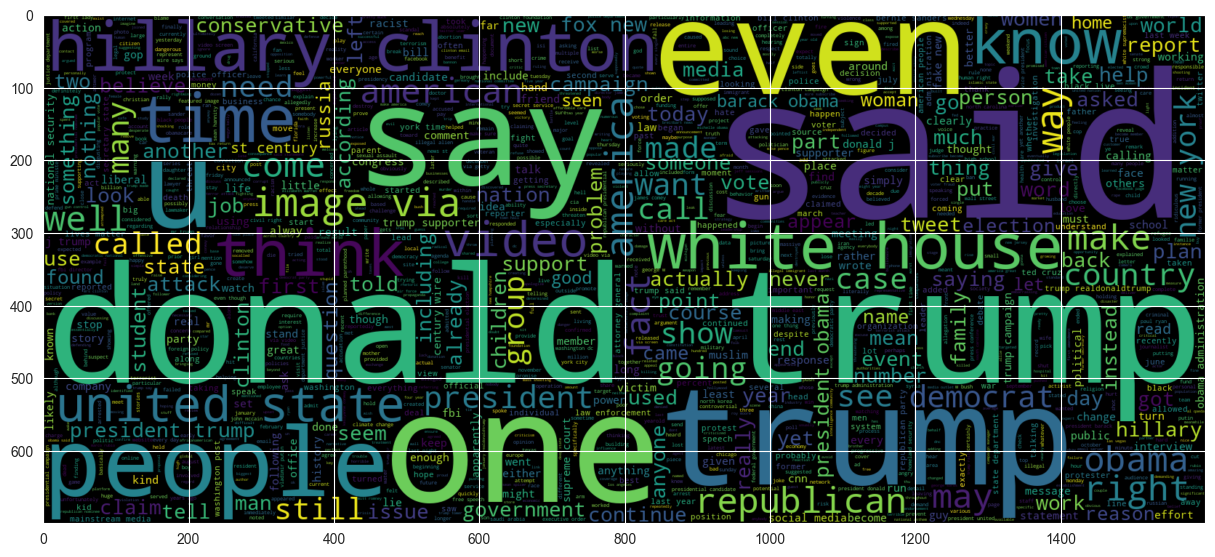

In [132]:
#NUAGE DES MOTS LES PLUS REDONDANTS DANS LES FAKE  NEWS
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(dataset[dataset.label==0].combined_text))
plt.imshow(wc, interpolation="bilinear")

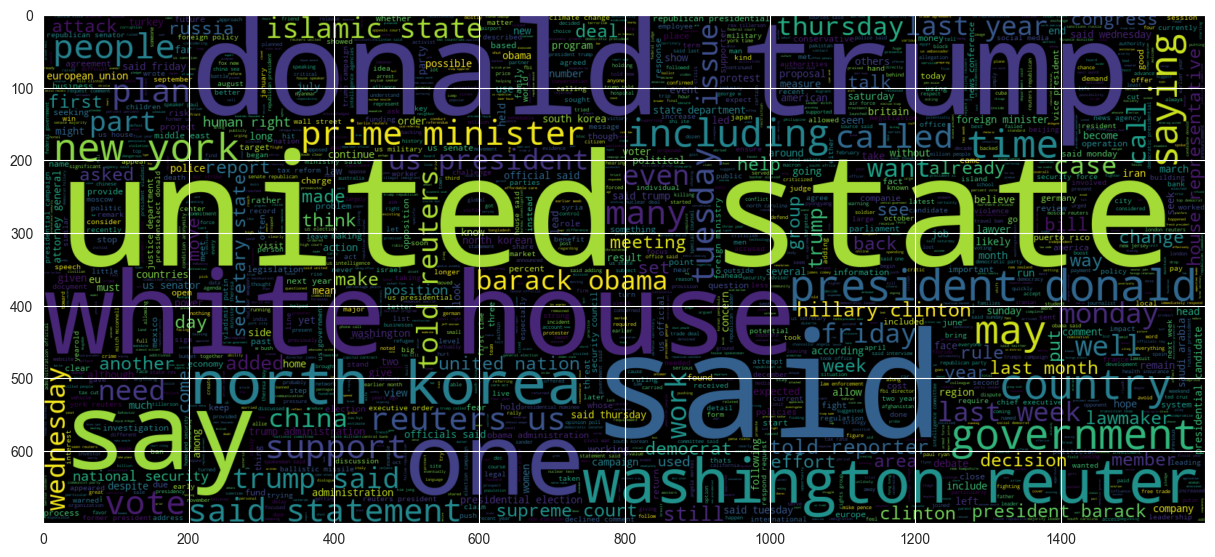

In [131]:
#NUAGE DES MOTS LES PLUS REDONDANTS DANS LES ARTICLES FIABLES
plt.figure(figsize=(15,15))
wc2=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(dataset[dataset.label==1].combined_text))
plt.imshow(wc2, interpolation="bilinear")